## Parsing image from notebook location

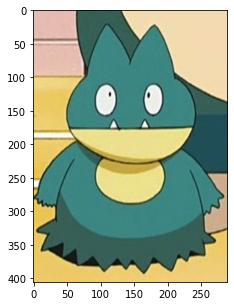

In [1]:
import imageio
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
pic = imageio.imread('munchlax.jpg')
plt.figure(figsize = (5,5))
plt.imshow(pic)

## Exploration of image properties

In [2]:
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (406, 290, 3)
Image Hight 406
Image Width 290
Dimension of Image 3


In [3]:
print('Image size {}'.format(pic.size)) 
print('Maximum RGB value in this image {}'.format(pic.max())) 
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 353220
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [4]:
# A specific pixel located at Row : 100 ; Column : 50  
# Each channel's value of it, gradually R , G , B  
print('Value of only R channel {}'.format(pic[ 100, 50, 0])) 
print('Value of only G channel {}'.format(pic[ 100, 50, 1])) 
print('Value of only B channel {}'.format(pic[ 100, 50, 2]))

Value of only R channel 202
Value of only G channel 170
Value of only B channel 97


## Experimenting with RGB values

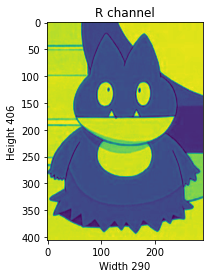

In [5]:
plt.title('R channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 0])
plt.show()

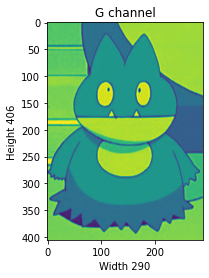

In [6]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 1]) 
plt.show()

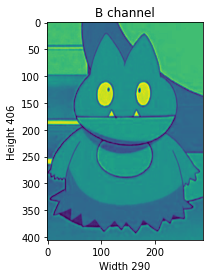

In [7]:
plt.title('B channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 2]) 
plt.show()

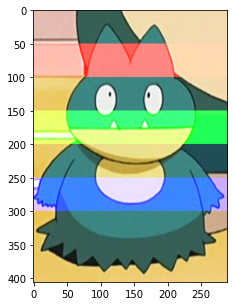

In [8]:
pic[50:100 , : , 0] = 255 # full intensity to those pixel's R channel along rows 50-100, columns unselected
pic[150:200, : , 1] = 255 # G channel for rows 150-200
pic[250:300, : , 2] = 255 # B channel for rows 250-300
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

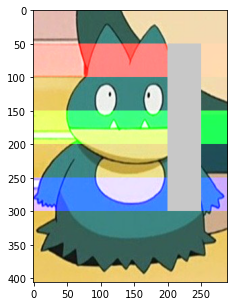

In [9]:
# set value 200 of all channels to those pixels which turns them to white 
pic[ 50:300 , 200:250 , [0,1,2] ] = 200  #select rows 50-300, columns 200-250, all 3 layers R, G and B, set to 200
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

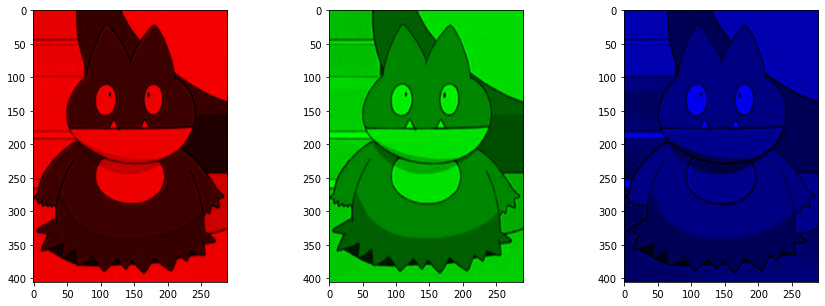

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
pic = imageio.imread('munchlax.jpg')
for c, ax in zip(range(3), ax):     
     # create zero matrix        
     split_img = np.zeros(pic.shape, dtype="uint8") 
     # 'dtype' by default: 'numpy.float64'  # assing each channel      
     split_img[ :, :, c] = pic[ :, :, c] # display each channel     
     ax.imshow(split_img)


## Greyscaling : weighted mean of the RGB value of original image, Y' = 0.299 R + 0.587 G + 0.114 B

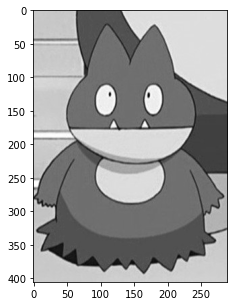

In [11]:
pic = imageio.imread('munchlax.jpg') 
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])   
gray = gray(pic) 
plt.figure( figsize = (5,5))  
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.show()

## Processing using pixel values (brightness/colour)

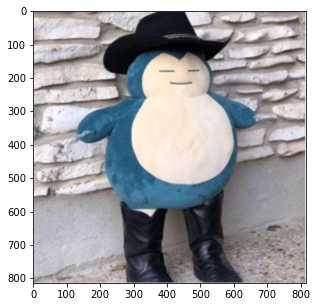

In [54]:
pic = imageio.imread('snorlax.jpg') 
plt.figure(figsize=(5,5)) 
plt.imshow(pic) 
plt.show()

In [55]:
low_pixel = pic < 20  
# to be sure of it let's check if any values in low_pixel are True or not 
if low_pixel.any() == True:     
    print(low_pixel.shape)
    
# Shape of low_pixel is same as that of pic because low_pixel is just the makeup of pic in boolean form

(814, 817, 3)


## Setting pixel values

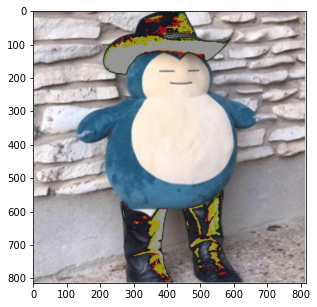

In [56]:
# set value to number from range 0-255, note that numbers out of this index will be subject to modulo 256
pic[low_pixel] = 150
# display the image
plt.figure( figsize = (5,5))
plt.imshow(pic)
plt.show()

## Image masking (removing portions)

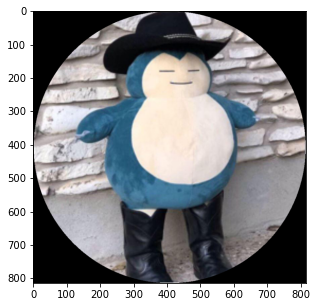

In [57]:
pic = imageio.imread('snorlax.jpg')  
# seperate the row and column values  
total_row , total_col , layers = pic.shape  
'''     Create vector.     Ogrid is a compact method of creating a multidimensional ndarray operations in single lines.     
for ex:     
>>> ogrid[0:5,0:5]     
output: [array([[0],
                [1],
                [2],
                [3],
                [4]]),
         array([[0, 1, 2, 3, 4]])]  
''' 
x , y = np.ogrid[:total_row , :total_col]  
# get the center values of the image 
cen_x , cen_y = total_row/2 , total_col/2  
'''    
 Measure distance value from center to each border pixel.     
 To make it easy, we can think of draw a line from center to each edge pixel value --> s**2 = (Y-y)**2 + (X-x)**2  
''' 
distance_from_the_center = np.sqrt((x-cen_x)**2 + (y-cen_y)**2)  
# Select convenient radius value 
radius = (total_row/2)  
# Using logical operator '>'  
''' 
logical operator to do this task which will return as a value  of True for all the index according to the given condition 
''' 
circular_pic = distance_from_the_center > radius  
''' 
let assign value zero for all pixel value that outside the cirular disc. All the pixel value outside the circular disc, will be black now. 
''' 
pic[circular_pic] = 0 
plt.figure(figsize = (5,5)) 
plt.imshow(pic)  
plt.show()

## Colour processing

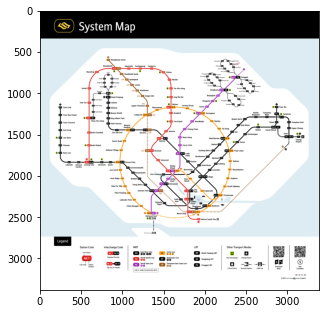

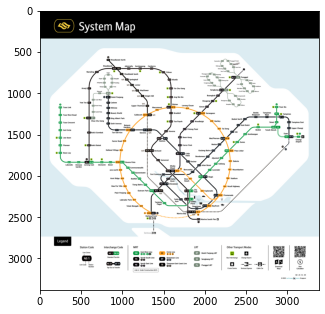

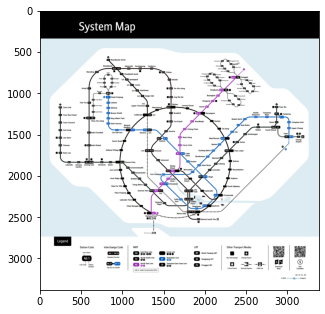

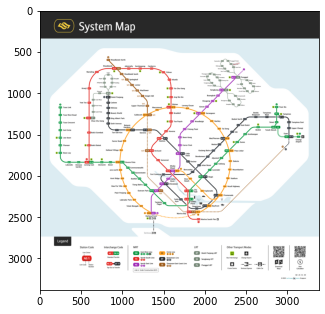

In [70]:
# Only Red Pixel value , higher than 128
pic = imageio.imread('mrt.png')
red_mask = pic[:, :, 0] < 128
pic[red_mask] = 0
plt.figure(figsize=(5,8))
plt.imshow(pic)

# Only Green Pixel value , higher than 128
pic = imageio.imread('mrt.png')
green_mask = pic[:, :, 1] < 128
pic[green_mask] = 0
plt.figure(figsize=(5,8))
plt.imshow(pic)
# Only Blue Pixel value , higher than 128
pic = imageio.imread('mrt.png')
blue_mask = pic[:, :, 2] < 128
pic[blue_mask] = 0
plt.figure(figsize=(5,8))
plt.imshow(pic)
# Composite mask using logical_and
pic = imageio.imread('mrt.png')
final_mask = np.logical_and(red_mask, green_mask, blue_mask)
pic[final_mask] = 40
plt.figure(figsize=(5,8))
plt.imshow(pic)
